# Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Создайте датафреймы X и y из этих данных.

In [3]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [9]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [10]:
from sklearn.manifold import TSNE

In [11]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [12]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [13]:
X_train_tsne

array([[ 2.12204380e+01, -2.16663609e+01],
       [-6.79995298e+00,  4.41380024e+00],
       [-1.87418709e+01,  1.32762280e+01],
       [ 3.20674477e+01, -2.15891914e+01],
       [-9.15039420e-01,  1.28781483e-01],
       [-1.21875181e+01,  6.96958160e+00],
       [-1.03621044e+01,  7.09753466e+00],
       [-2.46114998e+01,  1.63093758e+01],
       [ 3.20815125e+01, -2.32640839e+01],
       [ 2.93028183e+01, -2.29462776e+01],
       [-1.06919060e+01,  7.79876375e+00],
       [-4.99778986e+00,  9.21782780e+00],
       [-5.81789732e+00,  1.36191263e+01],
       [ 2.97544537e+01, -2.20396004e+01],
       [-5.14851332e+00,  1.48995562e+01],
       [-2.54496038e-01, -2.95872545e+00],
       [-1.93291998e+00,  3.00332975e+00],
       [-1.84606037e+01,  1.46066751e+01],
       [-1.43312941e+01,  1.03175507e+01],
       [-1.80831432e+01,  9.17829418e+00],
       [ 2.62317581e+01, -2.41894951e+01],
       [-2.92340100e-01,  5.35461235e+00],
       [-1.36408653e+01,  6.43175077e+00],
       [-8.

Постройте диаграмму рассеяния на этих данных.

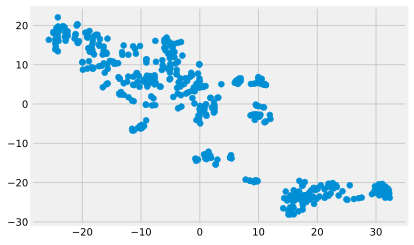

In [14]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

# Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [17]:
labels_train = kmeans.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

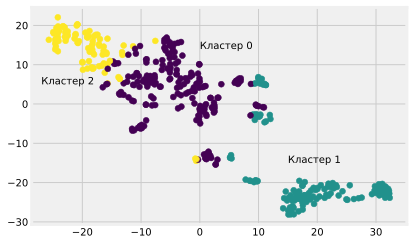

In [18]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.text(0, 14, 'Кластер 0')
plt.text(15, -15, 'Кластер 1')
plt.text(-27, 5, 'Кластер 2')

plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [19]:
y_train[labels_train==0].mean()

price    24.971204
dtype: float64

In [20]:
CRIM = X_train['CRIM']
CRIM[labels_train==0].mean()

0.42098554973821983

In [21]:
y_train[labels_train==1].mean()

price    16.179688
dtype: float64

In [22]:
CRIM[labels_train==1].mean()

10.637094062500003

In [23]:
y_train[labels_train==2].mean()

price    27.874118
dtype: float64

In [24]:
CRIM[labels_train==2].mean()

0.0721184705882353

# * Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

In [25]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

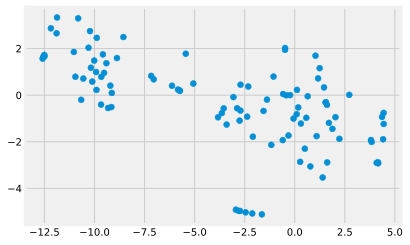

In [26]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1])
plt.show()

In [27]:
labels_train_d = kmeans.fit_predict(X_test_scaled)

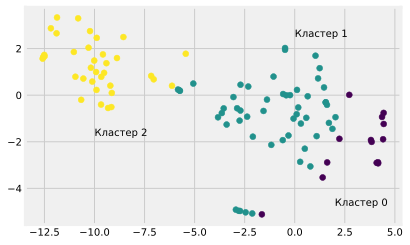

In [28]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_train_d)

plt.text(2, -4.75, 'Кластер 0')
plt.text(0, 2.5, 'Кластер 1')
plt.text(-10, -1.75, 'Кластер 2')

plt.show()

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [29]:
y_test[labels_train_d==0].mean()

price    33.871429
dtype: float64

In [30]:
CRIM_d = X_test['CRIM']
CRIM_d[labels_train_d==0].mean()

0.08618571428571427

In [31]:
y_test[labels_train_d==1].mean()

price    21.55283
dtype: float64

In [32]:
CRIM_d[labels_train_d==1].mean()

0.25200716981132076

In [33]:
y_test[labels_train_d==2].mean()

price    16.437143
dtype: float64

In [34]:
CRIM_d[labels_train_d==2].mean()

10.165531142857143